In [ ]:
# Rangga Yoga Pratama
#22.11.4775
#BDDM 1

#Import Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
!pip install scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data MINING/heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.shape

(1025, 14)

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Mengganti nama kolom
nama_kolom_baru = {
    "age": "umur",
    "sex": "jenis_kelamin",
    "cp": "nyeri_dada",
    "trestbps": "tekanan_darah",
    "chol": "kolesterol",
    "fbs": "gula_darah",
    "restecg": "elektrokardiografi",
    "thalach": "detak_jantung",
    "exang": "angina_terinduksi",
    "oldpeak": "depresi",
    "slope": "kemiringan",
    "ca": "jumlah_pembuluh",
    "thal": "status_thalassemia",
    "target": "target"
}

# Mengganti nama kolom pada DataFrame
data.rename(columns=nama_kolom_baru, inplace=True)

# Menampilkan DataFrame setelah mengganti nama kolom
print("\nDataFrame setelah mengganti nama kolom:")
print(data.head())



DataFrame setelah mengganti nama kolom:
   umur  jenis_kelamin  nyeri_dada  tekanan_darah  kolesterol  gula_darah  \
0    52              1           0            125         212           0   
1    53              1           0            140         203           1   
2    70              1           0            145         174           0   
3    61              1           0            148         203           0   
4    62              0           0            138         294           1   

   elektrokardiografi  detak_jantung  angina_terinduksi  depresi  kemiringan  \
0                   1            168                  0      1.0           2   
1                   0            155                  1      3.1           0   
2                   1            125                  1      2.6           0   
3                   1            161                  0      0.0           2   
4                   1            106                  0      1.9           1   

   jumlah_pembu

In [9]:
data["target"].value_counts()

,count
target,
1,526
0,499


In [10]:
data[data.columns[1:]].corr()['target'][:-1]

,target
jenis_kelamin,-0.279501
nyeri_dada,0.434854
tekanan_darah,-0.138772
kolesterol,-0.099966
gula_darah,-0.041164
elektrokardiografi,0.134468
detak_jantung,0.422895
angina_terinduksi,-0.438029
depresi,-0.438441
kemiringan,0.345512


In [11]:
# Checking for missing values
print(data.isnull().sum())

umur                  0
jenis_kelamin         0
nyeri_dada            0
tekanan_darah         0
kolesterol            0
gula_darah            0
elektrokardiografi    0
detak_jantung         0
angina_terinduksi     0
depresi               0
kemiringan            0
jumlah_pembuluh       0
status_thalassemia    0
target                0
dtype: int64


In [12]:
data.nunique()

,0
umur,41
jenis_kelamin,2
nyeri_dada,4
tekanan_darah,49
kolesterol,152
gula_darah,2
elektrokardiografi,3
detak_jantung,91
angina_terinduksi,2
depresi,40


Handling outliers for umur


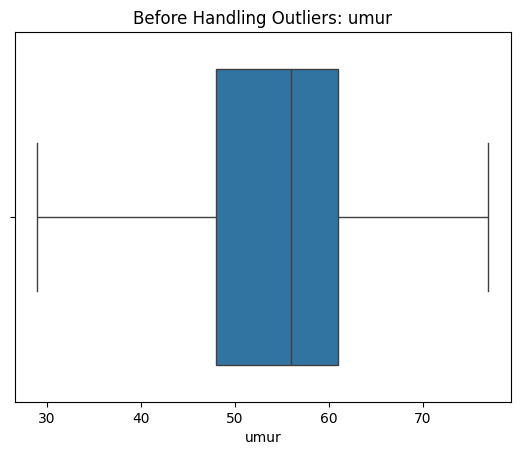

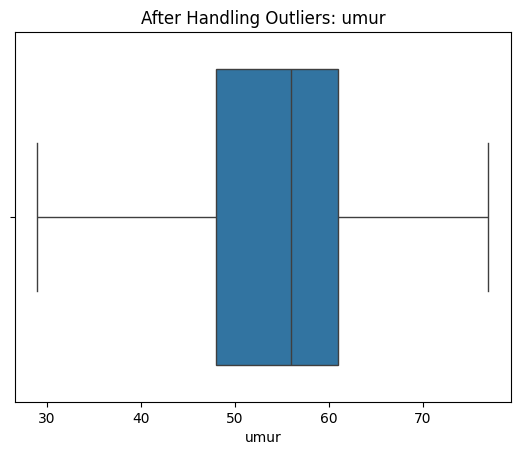

Handling outliers for tekanan_darah


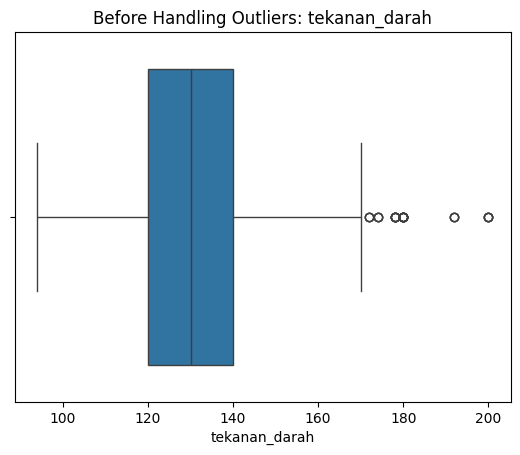

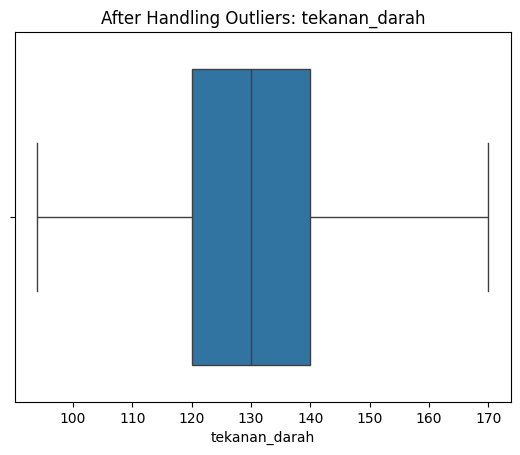

Handling outliers for kolesterol


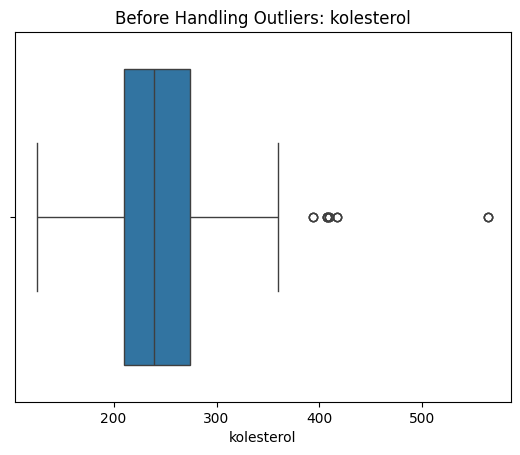

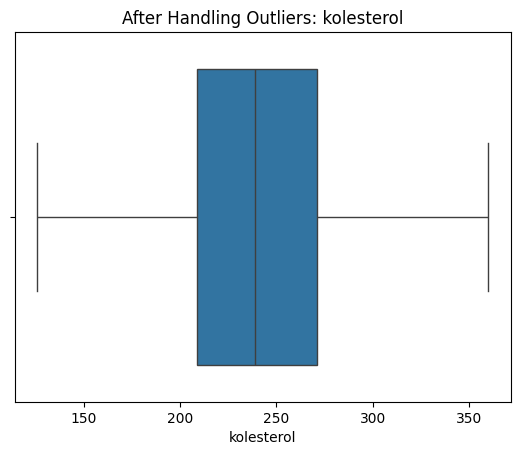

Handling outliers for detak_jantung


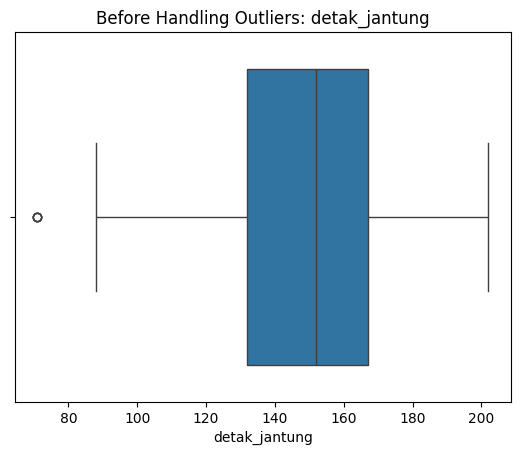

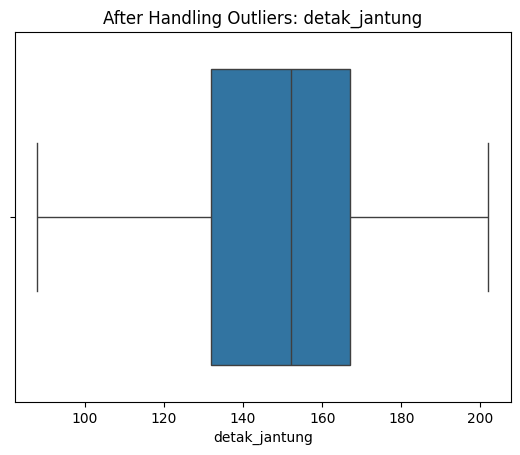

Handling outliers for depresi


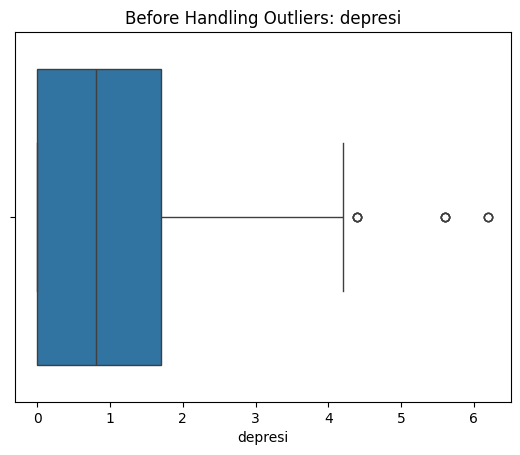

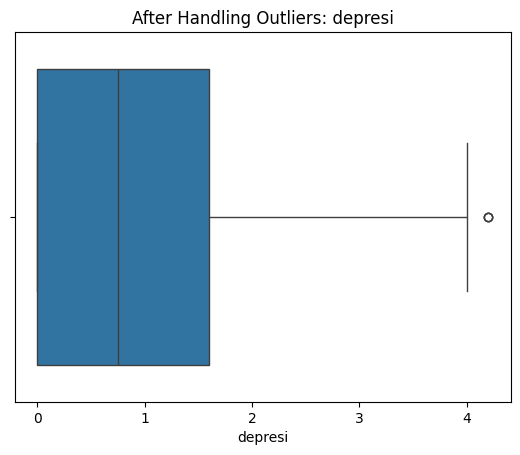

(964, 14)

In [14]:
# Fungsi untuk mendeteksi dan menangani outlier menggunakan metode IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Memfilter data yang berada dalam rentang batas bawah dan atas
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Visualisasi outlier sebelum dan sesudah penanganan
def visualize_outliers(df, column, title):
    sns.boxplot(x=df[column])
    plt.title(title)
    plt.show()

numerical_columns = ['umur', 'tekanan_darah', 'kolesterol', 'detak_jantung', 'depresi']

# Penanganan outlier untuk setiap kolom numerik
for column in numerical_columns:
    print(f"Handling outliers for {column}")

    visualize_outliers(data, column, f"Before Handling Outliers: {column}")
    data = handle_outliers_iqr(data, column)
    visualize_outliers(data, column, f"After Handling Outliers: {column}")

# Menampilkan jumlah data setelah outlier ditangani
data.shape

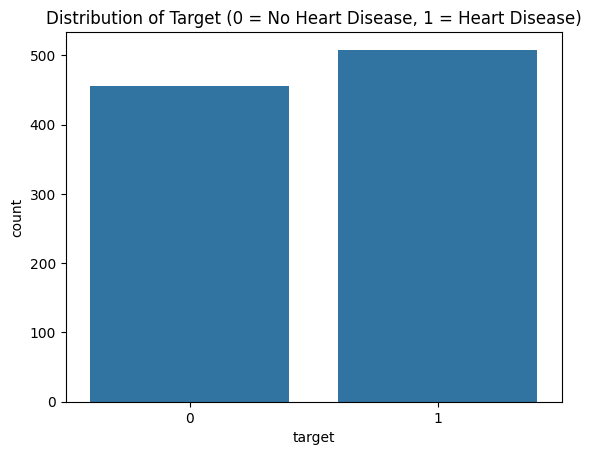

In [15]:
# Plot Target variable distribution
sns.countplot(x='target', data=data)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

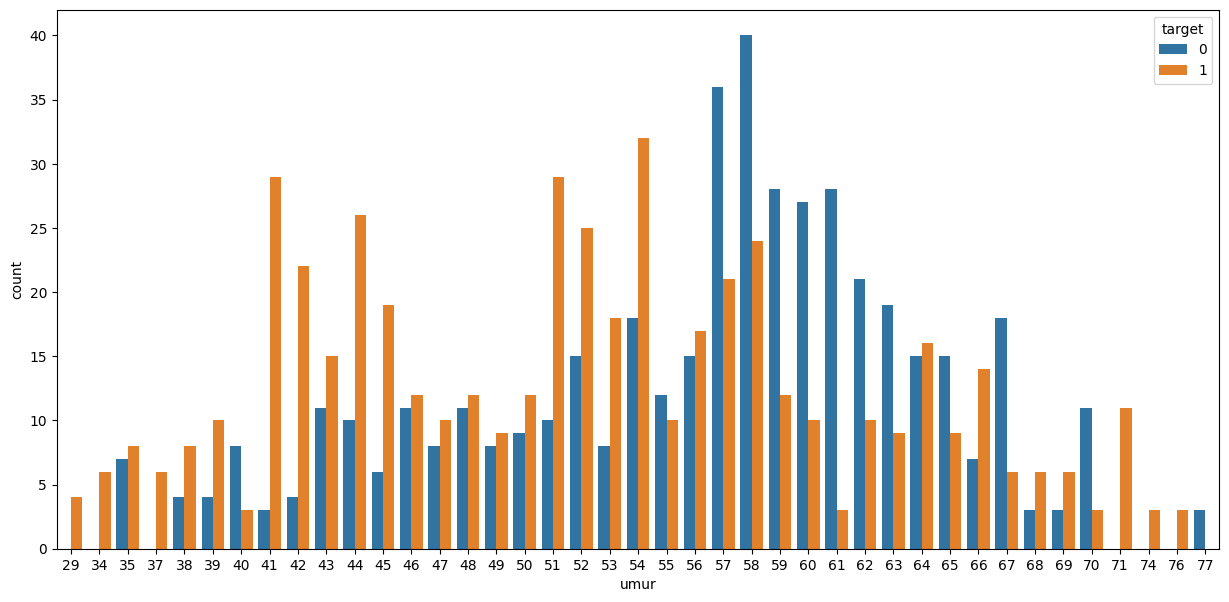

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x='umur', data=data, hue='target')
plt.show()

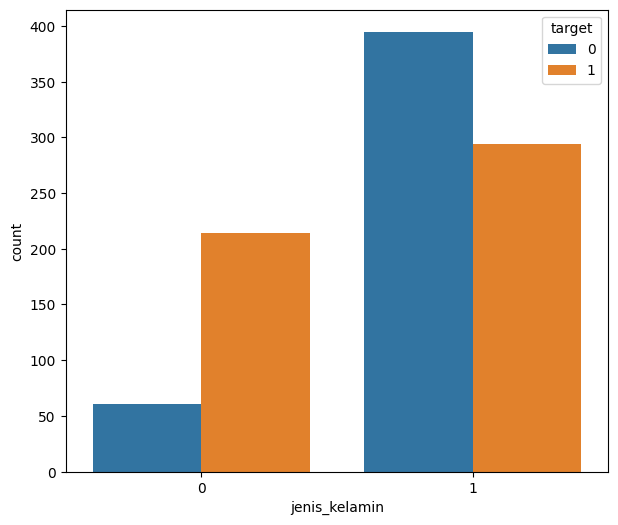

In [17]:
plt.figure(figsize=(7,6))
sns.countplot(x='jenis_kelamin',hue='target',data=data)
plt.show()

#Corelation Head Map

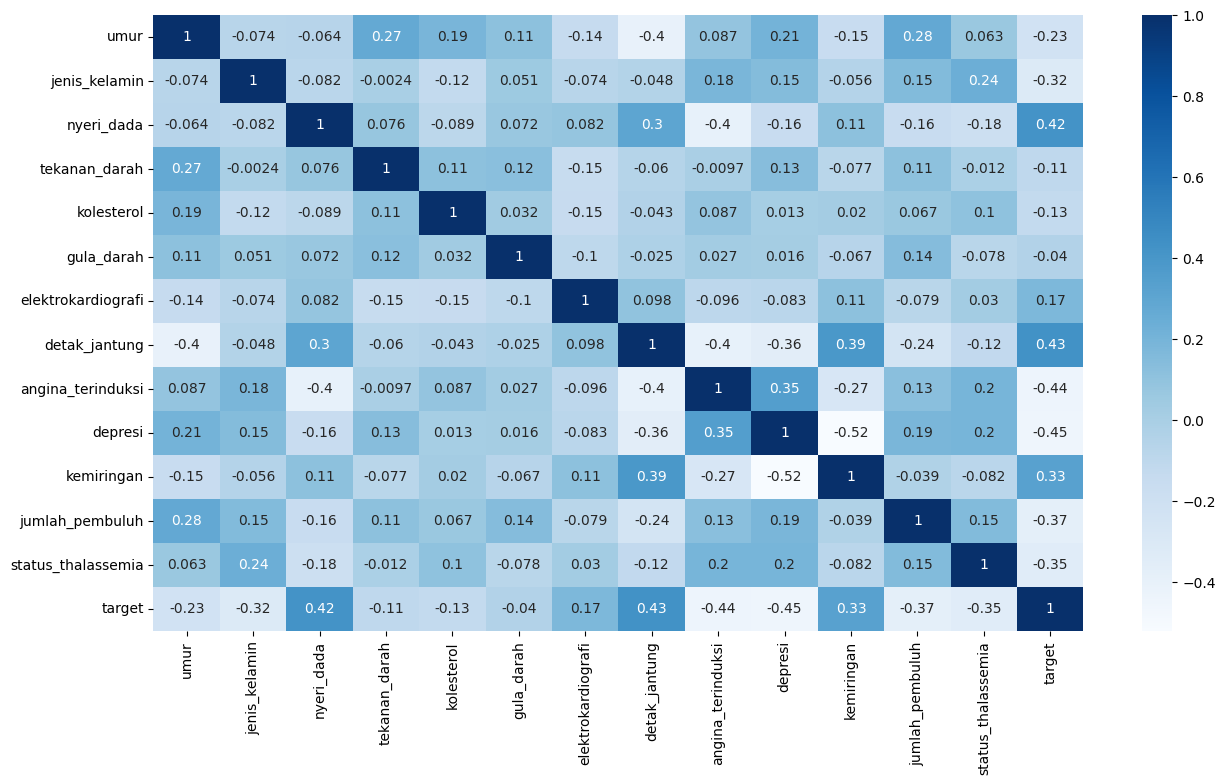

In [18]:
# Plot correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True, cmap="Blues")
plt.show()

#Seleksi Fitur

In [32]:
# Mendapatkan pentingnya fitur
importances = RF.feature_importances_ # Change 'model' to 'RF'
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Menampilkan fitur yang paling penting
print("\nPentingnya Fitur:")
print(feature_importances)


Pentingnya Fitur:
                    importance
nyeri_dada            0.232071
status_thalassemia    0.189157
jumlah_pembuluh       0.136521
depresi               0.103806
angina_terinduksi     0.096933
detak_jantung         0.073238
kemiringan            0.048271
umur                  0.045337
jenis_kelamin         0.039577
kolesterol            0.014634
tekanan_darah         0.012353
elektrokardiografi    0.005723
gula_darah            0.002378


In [33]:
# Fitur paling berpengaruh berdasarkan importance
fitur_penting = [
    "nyeri_dada",
    "status_thalassemia",
    "jumlah_pembuluh",
    "depresi",
    "angina_terinduksi"
]

In [34]:
# Memisahkan fitur dan target berdasarkan fitur penting
X_selected = data[fitur_penting]
y = data["target"]

#Spliting Data

In [35]:
X = data.drop('target', axis=True)
y = data['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Normalisasi

In [36]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Random Forest

In [37]:
RF = RandomForestClassifier( max_depth = 3 , random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [43]:
# Menyimpan model yang telah dilatih
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(RF, f)

In [38]:
RF_pred = RF.predict(X_test)
RF_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1])

#Evaluation

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       144
           1       0.87      0.94      0.90       146

    accuracy                           0.90       290
   macro avg       0.90      0.90      0.90       290
weighted avg       0.90      0.90      0.90       290



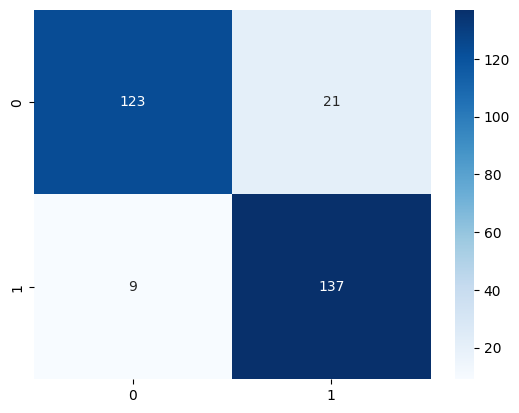

In [39]:
RF_pred = RF.predict(X_test)
print(classification_report(y_test, RF_pred))

conf_matrix = confusion_matrix(y_test, RF_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [40]:
RF_pred = RF.predict(X_test)  # Assuming 'RF' is your trained RandomForest model

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, RF_pred) # Using RF_pred which contains predicted values.
mse = mean_squared_error(y_test, RF_pred)  # Using RF_pred which contains predicted values.
rmse = np.sqrt(mse)
r2 = r2_score(y_test, RF_pred)  # Using RF_pred which contains predicted values.

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.32
R-squared (R2): 0.59


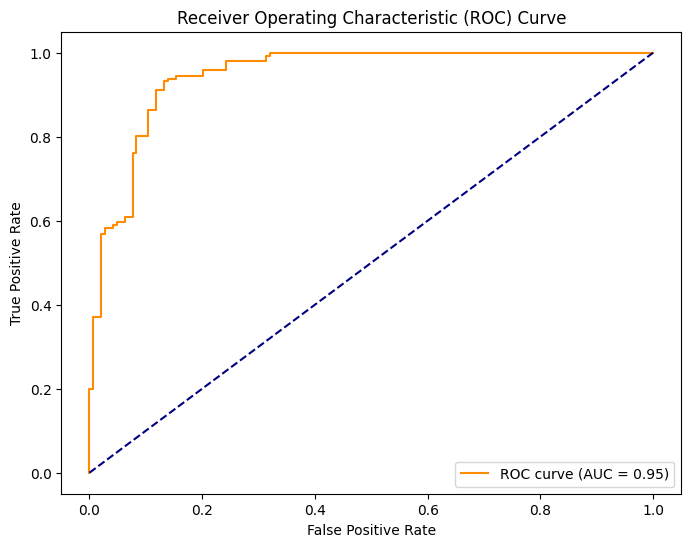

In [41]:
# Get predicted probabilities
RF_probs = RF.predict_proba(X_test)[:, 1]  # Take probability of the positive class

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, RF_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()